In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn import decomposition
from sklearn import datasets

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url , names=['sepal length', 'sepal width', 'petal length', 'petal width' , 'target'])

In [2]:

from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

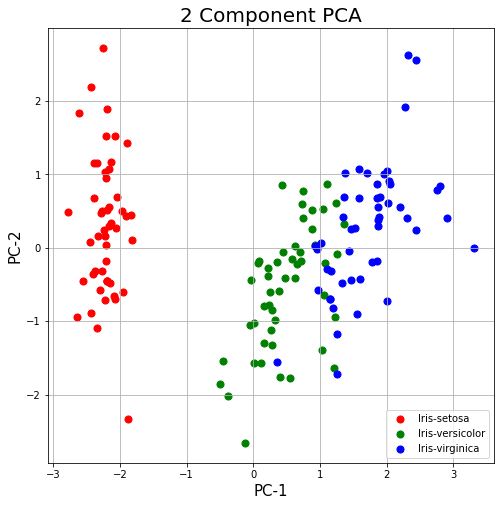

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC-1', 'PC-2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC-1', fontsize = 15)
ax.set_ylabel('PC-2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC-1']
               , finalDf.loc[indicesToKeep, 'PC-2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()